## LOAD THE DATASET

In [8]:
import pandas as pd

#Load the dataset
titanic_df = pd.read_csv('train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## CHECKING NULL VALUES

In [10]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## DROP UNNECESSARY COLUMNS

In [11]:
titanic_df.drop(columns = ["Cabin", "Ticket"],inplace = True,axis=1)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


## FILL MISSING VALUES

In [12]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace = True)
titanic_df['Embarked'].fillna('s', inplace = True)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


## DETECT OUTLIERS

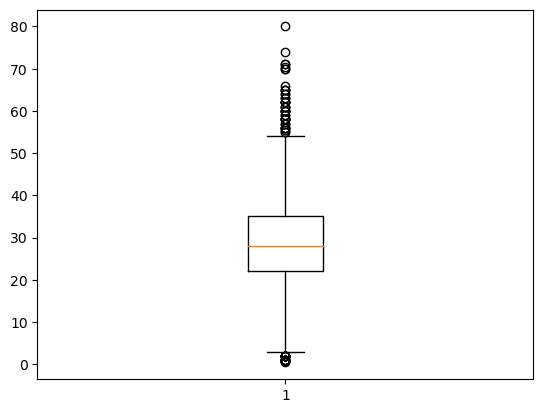

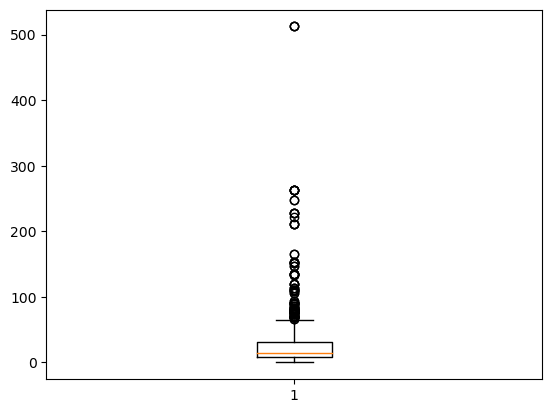

In [14]:
import matplotlib.pyplot as plt

# Boxplot of 'Age'
plt.boxplot(titanic_df['Age'])
plt.show()

# Boxplot of 'Fare'
plt.boxplot(titanic_df['Fare'])
plt.show()

## HANDLE OUTLIERS

In [17]:
# Remove outliers in 'Age'
titanic_df = titanic_df[titanic_df['Age'] <= 70]

# Impute outliers in 'Fare' with the median value
median_fare = titanic_df['Fare'].median()
titanic_df.loc[titanic_df['Fare'] > 100, 'Fare'] = median_fare
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


## HANDLE CATEGORICAL FEATURES

In [18]:
# one-hot encode 'Sex' and 'Embarked' column
titanic_df = pd.get_dummies(titanic_df, columns=['Sex','Embarked'], drop_first=True)
titanic_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_s
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,True,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,True,False,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,False,False,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.4500,False,False,True,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,True,False,False,False


## HANDLE NUMERICAL FEATURES

In [23]:
from sklearn.preprocessing import StandardScaler

# standardize 'Age' and 'Fare' column
scaler = StandardScaler()
titanic_df[['Age', 'Fare']] = scaler.fit_transform(titanic_df[['Age', 'Fare']])
titanic_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_s
0,1,0,3,"Braund, Mr. Owen Harris",-0.563705,1,0,-0.722737,True,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.704184,1,0,2.432805,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.246733,0,0,-0.689474,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.466454,1,0,1.536737,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",0.466454,0,0,-0.683314,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",-0.167490,0,0,-0.439379,True,False,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",-0.801434,0,0,0.398376,False,False,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-0.088247,1,2,0.075594,False,False,True,False
889,890,1,1,"Behr, Mr. Karl Howell",-0.246733,0,0,0.398376,True,False,False,False


## EXPLORATORY DATA ANALYSIS

### UNDERSTAND THE DATASET

In [24]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  886 non-null    int64  
 1   Survived     886 non-null    int64  
 2   Pclass       886 non-null    int64  
 3   Name         886 non-null    object 
 4   Age          886 non-null    float64
 5   SibSp        886 non-null    int64  
 6   Parch        886 non-null    int64  
 7   Fare         886 non-null    float64
 8   Sex_male     886 non-null    bool   
 9   Embarked_Q   886 non-null    bool   
 10  Embarked_S   886 non-null    bool   
 11  Embarked_s   886 non-null    bool   
dtypes: bool(4), float64(2), int64(5), object(1)
memory usage: 65.8+ KB


### VISUALIZE THE DATA

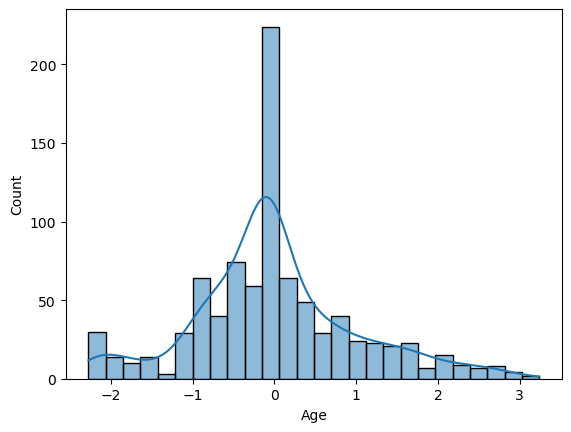

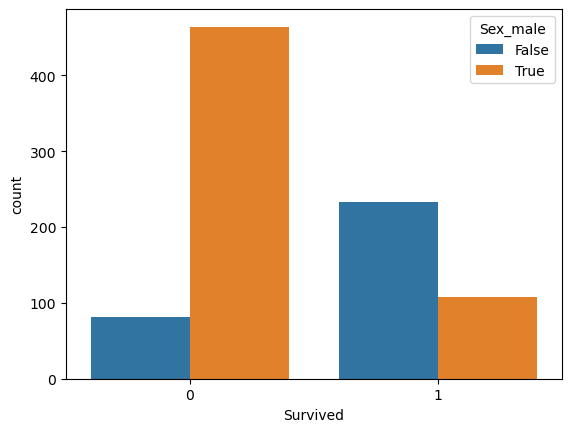

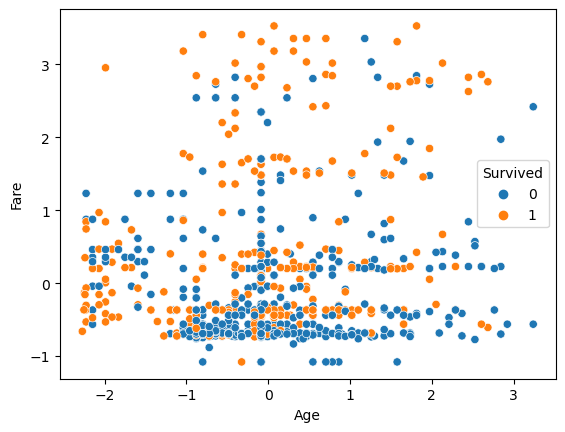

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'Age'
sns.histplot(data=titanic_df,x='Age', kde=True)
plt.show()

# Bar chart of 'Survived' by'Sex'
sns.countplot(data=titanic_df, x='Survived' , hue='Sex_male')
plt.show()

# Scatterplot of 'Age' and 'Fare' by 'Survived'
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived')
plt.show()

### REVIEW THE DATA

In [30]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_s
0,1,0,3,"Braund, Mr. Owen Harris",-0.563705,1,0,-0.722737,True,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.704184,1,0,2.432805,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.246733,0,0,-0.689474,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.466454,1,0,1.536737,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",0.466454,0,0,-0.683314,True,False,True,False


## SAMPLING

### SPLIT THE DATASET

In [35]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(titanic_df, test_size=0.2, random_state=42)


train_test_split function from scikit-learn to split the dataset into training and testing sets. We used a test size of 0.2, which means that 20% of the data will be used for testing.


## STARTIFIED SAMPLING

In [39]:
train_df, test_df = train_test_split(titanic_df, test_size=0.2, random_state=42, stratify=titanic_df['Survived'])

stratify parameter to the train_test_split function to perform stratified sampling based on the 'Survived' column.

##  SAMPLING MENTHOD

In [40]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/258.3 kB 409.6 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updat

In [44]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
train_df,_ = ros.fit_resample(train_df.drop('Survived', axis=1), train_df['Survived'])
train_df['Survived'] = train_df['Survived'].astype(int)

KeyError: 'Survived'

## DIAGNOSTICS USING SKLEARN

In [45]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  886 non-null    int64  
 1   Survived     886 non-null    int64  
 2   Pclass       886 non-null    int64  
 3   Name         886 non-null    object 
 4   Age          886 non-null    float64
 5   SibSp        886 non-null    int64  
 6   Parch        886 non-null    int64  
 7   Fare         886 non-null    float64
 8   Sex_male     886 non-null    bool   
 9   Embarked_Q   886 non-null    bool   
 10  Embarked_S   886 non-null    bool   
 11  Embarked_s   886 non-null    bool   
dtypes: bool(4), float64(2), int64(5), object(1)
memory usage: 65.8+ KB


## split dataset

In [47]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y=test = train_test_split(X,y,test_size=0.2, random_state=42)

## MODEL SELECTION

In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

## STANDARD SCALER

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_std = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

## NORMALIZATION

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_norm = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))


## TRANFORMATIONS

In [51]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_poly = poly.transform(X_test.select_dtypes(include=['float64', 'int64']))
